In [0]:
from numpy.random import seed
from tensorflow import set_random_seed
import random

seed(485)
set_random_seed(485)
random.seed(485)

In [0]:
import pandas as pd
import numpy as np
import tensorflow

In [0]:
df = pd.read_csv('/content/revisitedFeatures_binary.csv')
df

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained,year,play_type
0,True,7,True,1,2715,915,1,1,1,1,-1,2019,Pass
1,True,19,False,3,902,902,1,1,2,20,51,2018,Pass
2,True,17,False,2,1806,6,2,2,3,2,2,2017,Pass
3,True,18,False,2,2055,255,2,2,1,10,63,2017,Pass
4,True,7,True,1,3210,1410,3,3,1,3,3,2019,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,False,-21,False,3,1540,1540,13,13,1,10,4,2018,Rush
9645,False,-18,False,4,595,595,12,12,1,10,1,2018,Rush
9646,False,-21,False,2,2280,480,10,10,2,6,1,2018,Rush
9647,False,-11,False,4,263,263,8,8,1,8,8,2018,Rush


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python **super important for encoding function**

In [0]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:11]
y = df.iloc[:,12]

X = X.replace({True:1, False:0})
X

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
0,1,7,1,1,2715,915,1,1,1,1,-1
1,1,19,0,3,902,902,1,1,2,20,51
2,1,17,0,2,1806,6,2,2,3,2,2
3,1,18,0,2,2055,255,2,2,1,10,63
4,1,7,1,1,3210,1410,3,3,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
9644,0,-21,0,3,1540,1540,13,13,1,10,4
9645,0,-18,0,4,595,595,12,12,1,10,1
9646,0,-21,0,2,2280,480,10,10,2,6,1
9647,0,-11,0,4,263,263,8,8,1,8,8


In [0]:
def oheAndReplace(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

from keras.utils import to_categorical
#y = y.to_frame()
#y = oheAndReplace(y, 'play_type')
y = y.replace({'Rush':0, 'Pass':1, 'FG':2, 'Punt':3})
y = to_categorical(y)
y

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.15)
X_validation, X_test, y_validation, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

In [0]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining', 'secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_train.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_train = scaled_features
X_train

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
2461,1,-1.002805,1,-0.496403,83.701744,-800.824534,-8.083039,30.423241,-0.746129,1.5592,-6.917571
1692,1,-4.002805,1,-0.496403,189.701744,-694.824534,13.916961,-5.576759,1.253871,1.5592,7.082429
9305,0,2.997195,1,1.503597,-1285.298256,-369.824534,10.916961,-8.576759,-0.746129,1.5592,-4.917571
4256,0,-32.002805,0,-0.496403,184.701744,-699.824534,-14.083039,36.423241,1.253871,11.5592,-1.917571
8934,0,-43.002805,0,1.503597,-1647.298256,-731.824534,-2.083039,24.423241,-0.746129,1.5592,-5.917571
...,...,...,...,...,...,...,...,...,...,...,...
2414,1,10.997195,0,-0.496403,388.701744,-495.824534,-5.083039,27.423241,1.253871,-5.4408,-6.917571
1601,1,3.997195,0,-0.496403,17.701744,-866.824534,7.916961,-11.576759,-0.746129,1.5592,-6.917571
174,1,10.997195,0,-0.496403,267.701744,-616.824534,-8.083039,-27.576759,1.253871,1.5592,-6.917571
8600,0,-0.002805,1,-1.496403,880.701744,-3.824534,-17.083039,-36.576759,0.253871,1.5592,-1.917571


Repeat for the validation data.

In [0]:
#ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining','secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_validation.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_validation = scaled_features
X_validation

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
1652,1,21.066298,0,0.566298,-454.001381,515.611878,12.020718,-8.335635,-0.741713,11.531768,1.839779
1268,1,0.066298,1,-0.433702,399.998619,-430.388122,-16.979282,-37.335635,1.258287,-2.468232,-1.160221
2552,1,4.066298,1,-1.433702,896.998619,66.611878,-15.979282,39.664365,1.258287,9.531768,-7.160221
5164,1,-2.933702,1,-1.433702,1415.998619,585.611878,-20.979282,-41.335635,-0.741713,-1.468232,-6.160221
6885,1,11.066298,0,0.566298,-333.001381,636.611878,1.020718,-19.335635,0.258287,-3.468232,10.839779
...,...,...,...,...,...,...,...,...,...,...,...
6893,1,-1.933702,1,-0.433702,264.998619,-565.388122,2.020718,-18.335635,0.258287,-3.468232,-4.160221
4809,0,-13.933702,0,1.566298,-1148.001381,-178.388122,-20.979282,-41.335635,1.258287,-2.468232,-7.160221
5231,1,-5.933702,1,0.566298,-479.001381,490.611878,-16.979282,-37.335635,1.258287,-0.468232,-2.160221
6312,1,22.066298,0,0.566298,-88.001381,881.611878,-2.979282,26.664365,-0.741713,1.531768,3.839779


Repeat for test data.

In [0]:
#ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining', 'secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_test.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_test = scaled_features
X_test

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
3721,0,-4.791436,1,-1.48895,1565.074586,689.936464,1.353591,-19.414365,1.296961,4.477901,-6.906077
2058,1,-7.791436,1,1.51105,-1251.925414,-327.063536,11.353591,10.585635,1.296961,-3.522099,-0.906077
4958,0,9.208564,0,-1.48895,971.074586,95.936464,1.353591,20.585635,0.296961,1.477901,-6.906077
8410,0,-1.791436,1,0.51105,-193.925414,730.936464,-10.646409,32.585635,-0.703039,1.477901,-5.906077
6076,1,-11.791436,1,1.51105,-1674.925414,-750.063536,7.353591,14.585635,-0.703039,1.477901,-2.906077
...,...,...,...,...,...,...,...,...,...,...,...
2569,1,-7.791436,1,-1.48895,1420.074586,544.936464,-20.646409,42.585635,1.296961,3.477901,-6.906077
4392,0,-4.791436,1,1.51105,-1674.925414,-750.063536,21.353591,0.585635,-0.703039,1.477901,-6.906077
8006,0,1.208564,1,-1.48895,1290.074586,414.936464,-1.646409,23.585635,0.296961,-0.522099,-1.906077
579,1,-11.791436,1,-1.48895,1254.074586,378.936464,17.353591,4.585635,-0.703039,1.477901,7.093923


In [0]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(11,activation='elu', input_dim=11))
model.add(layers.Dense(22,activation='elu'))
model.add(layers.Dense(22,activation='elu'))
model.add(layers.Dense(11,activation='elu'))
model.add(layers.Dense(11,activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
history2 = model.fit(X_train, y_train, batch_size=24, epochs=130, validation_data=(X_validation, y_validation))

Train on 8201 samples, validate on 724 samples
Epoch 1/130
8201/8201 [==============================] - 1s 107us/sample - loss: 3.5002 - acc: 0.5037 - val_loss: 0.7168 - val_acc: 0.5180
Epoch 2/130
8201/8201 [==============================] - 1s 84us/sample - loss: 0.8598 - acc: 0.5062 - val_loss: 0.6925 - val_acc: 0.5124
Epoch 3/130
8201/8201 [==============================] - 1s 81us/sample - loss: 0.7872 - acc: 0.5090 - val_loss: 0.7304 - val_acc: 0.5276
Epoch 4/130
8201/8201 [==============================] - 1s 82us/sample - loss: 0.7557 - acc: 0.4999 - val_loss: 0.6929 - val_acc: 0.5318
Epoch 5/130
8201/8201 [==============================] - 1s 82us/sample - loss: 0.7306 - acc: 0.5059 - val_loss: 0.6912 - val_acc: 0.5249
Epoch 6/130
8201/8201 [==============================] - 1s 80us/sample - loss: 0.7146 - acc: 0.5218 - val_loss: 0.6932 - val_acc: 0.5235
Epoch 7/130
8201/8201 [==============================] - 1s 84us/sample - loss: 0.7124 - acc: 0.5190 - val_loss: 0.6919 - va

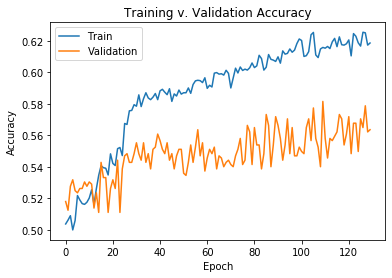

In [0]:
import matplotlib.pyplot as plt

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Training v. Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

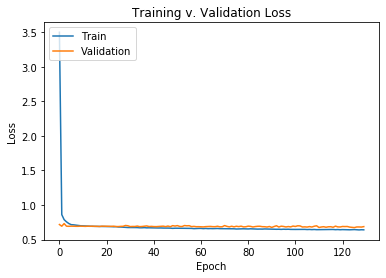

In [0]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Training v. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
model.evaluate(X_test, y_test)

724/724 [==============================] - 0s 31us/sample - loss: 0.6602 - acc: 0.5953


[0.6601625200134614, 0.5953039]

In [0]:
from sklearn.metrics import classification_report

#predictions = model.predict(X_test)
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(Y_test, y_pred, target_names=['Rush', 'Pass'], digits=4))

              precision    recall  f1-score   support

        Rush     0.5755    0.5838    0.5796       346
        Pass     0.6139    0.6058    0.6099       378

    accuracy                         0.5953       724
   macro avg     0.5947    0.5948    0.5947       724
weighted avg     0.5956    0.5953    0.5954       724



In [0]:
#model.save('coachingModel7375b.h5')